In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score

In [2]:
data=pd.read_csv("/content/magic04.data")

In [3]:
data

,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.011,-8.2027,40.092,81.8828,g
0,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
1,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
2,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
3,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
4,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.0980,g
...,...,...,...,...,...,...,...,...,...,...,...
19014,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19015,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19016,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19017,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


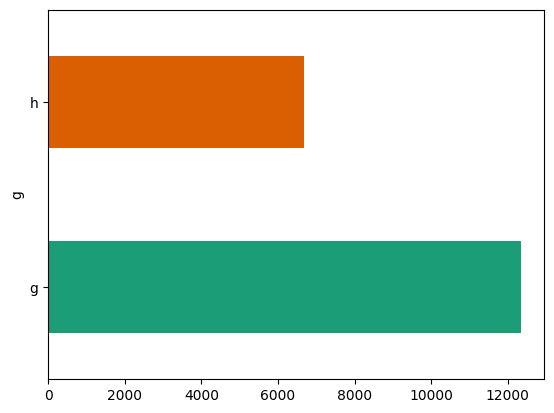

In [4]:
data.groupby('g').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(True)

In [5]:
data["g"].unique()

array(['g', 'h'], dtype=object)

In [6]:

majority_class = data[data['g'] == 'g']
minority_class = data[data['g'] == 'h']

# Get the size of the minority class
minority_class_size = len(minority_class)

# Randomly undersample the majority class to match the size of the minority class
majority_class_undersampled = majority_class.sample(n=minority_class_size, random_state=42)

# Combine the balanced majority class with the minority class
balanced_data = pd.concat([majority_class_undersampled, minority_class])

# Shuffle the balanced dataset to ensure a random distribution
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Now the dataset is balanced with equal sizes for both classes
print(f"Balanced dataset size: {len(balanced_data)}")
print(f"Balanced class distribution:\n{balanced_data['g'].value_counts()}")



Balanced dataset size: 13376
Balanced class distribution:
g
h    6688
g    6688
Name: count, dtype: int64


In [7]:
X = data.drop('g', axis=1)
y = data['g']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Tuning parameters for Decision Tree...
Best parameters for Decision Tree: {}
Best cross-validation accuracy for Decision Tree: 0.812

Tuning parameters for AdaBoost...
Best parameters for AdaBoost: {'learning_rate': 1, 'n_estimators': 200}
Best cross-validation accuracy for AdaBoost: 0.847

Tuning parameters for Random Forests...
Best parameters for Random Forests: {'max_depth': 30, 'n_estimators': 200}
Best cross-validation accuracy for Random Forests: 0.879

Tuning parameters for Naive Bayes...
Best parameters for Naive Bayes: {}
Best cross-validation accuracy for Naive Bayes: 0.727

Testing Decision Tree on the testing set...
Results for Decision Tree:
Accuracy: 0.817
Classification Report:
              precision    recall  f1-score   support

           g       0.86      0.86      0.86      3704
           h       0.74      0.75      0.74      2002

    accuracy                           0.82      5706
   macro avg       0.80      0.80      0.80      5706
weighted avg       0.82  

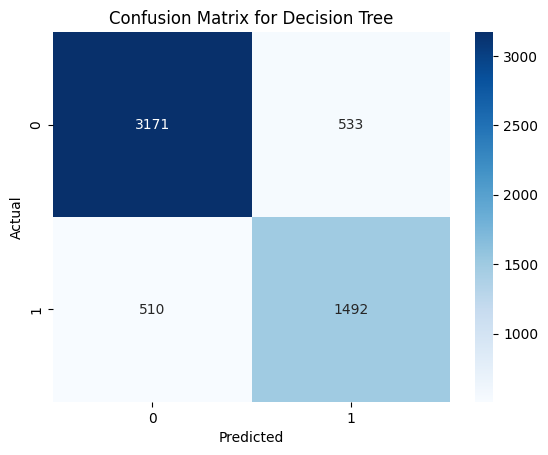


Testing AdaBoost on the testing set...
Results for AdaBoost:
Accuracy: 0.846
Classification Report:
              precision    recall  f1-score   support

           g       0.86      0.91      0.88      3704
           h       0.81      0.73      0.77      2002

    accuracy                           0.85      5706
   macro avg       0.84      0.82      0.83      5706
weighted avg       0.84      0.85      0.84      5706

Confusion Matrix:
[[3368  336]
 [ 541 1461]]


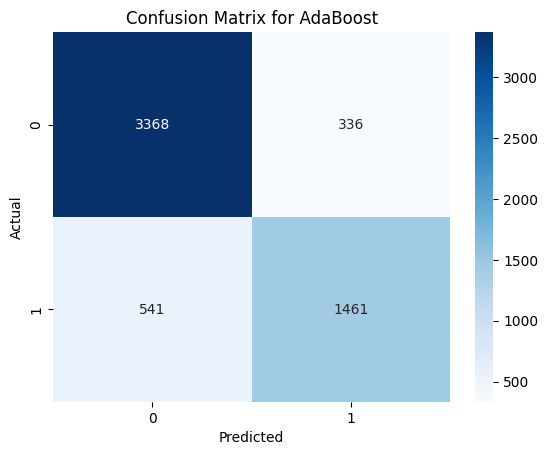


Testing Random Forests on the testing set...
Results for Random Forests:
Accuracy: 0.881
Classification Report:
              precision    recall  f1-score   support

           g       0.88      0.94      0.91      3704
           h       0.88      0.77      0.82      2002

    accuracy                           0.88      5706
   macro avg       0.88      0.86      0.87      5706
weighted avg       0.88      0.88      0.88      5706

Confusion Matrix:
[[3485  219]
 [ 459 1543]]


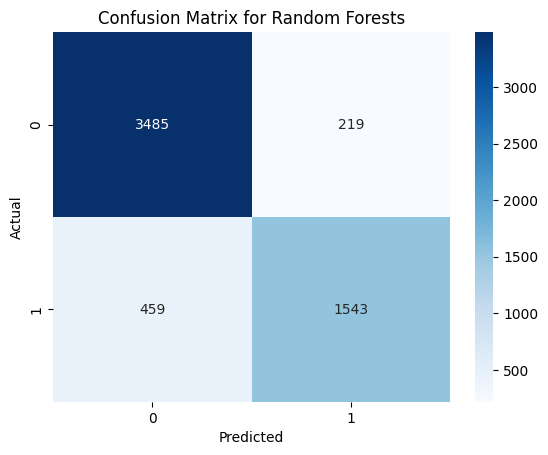


Testing Naive Bayes on the testing set...
Results for Naive Bayes:
Accuracy: 0.731
Classification Report:
              precision    recall  f1-score   support

           g       0.74      0.92      0.82      3704
           h       0.71      0.39      0.50      2002

    accuracy                           0.73      5706
   macro avg       0.72      0.65      0.66      5706
weighted avg       0.73      0.73      0.71      5706

Confusion Matrix:
[[3391  313]
 [1222  780]]


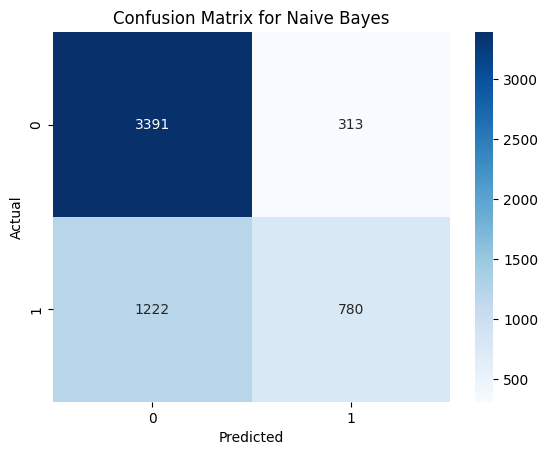

In [29]:
# Define the classifiers and their parameter grids
classifiers = {
    'Decision Tree': {
        'model': DecisionTreeClassifier(random_state=42),
        'params': {
            # No parameters to tune for Decision Tree in this case
        }
    },
    'AdaBoost': {
        'model': AdaBoostClassifier(random_state=42),
        'params': {
            'n_estimators': [50, 100, 150, 200],
            'learning_rate': [0.01, 0.1, 0.5, 1]
        }
    },
    'Random Forests': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [50, 100, 150, 200],
            'max_depth': [None, 10, 20, 30]
        }
    },
    'Naive Bayes': {
        'model': GaussianNB(),
        'params': {
            # No parameters to tune for Naive Bayes in this case
        }
    }
}

# Perform grid search cross-validation for each classifier
best_models = {}
for name, clf_info in classifiers.items():
    print(f"Tuning parameters for {name}...")

    # Set up cross-validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Create a GridSearchCV object
    grid_search = GridSearchCV(estimator=clf_info['model'], param_grid=clf_info['params'],
                               cv=cv, scoring='accuracy', n_jobs=-1)

    # Fit the GridSearchCV object to the training data
    grid_search.fit(X_train, y_train)

    # Get the best model and parameters
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    # Store the best model for future use
    best_models[name] = best_model

    print(f"Best parameters for {name}: {best_params}")
    print(f"Best cross-validation accuracy for {name}: {grid_search.best_score_:.3f}")
    print()

# Evaluate the best models on the testing set and print the results
for name, best_model in best_models.items():
    print(f"Testing {name} on the testing set...")

    # Predict using the best model
    y_pred = best_model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Calculate precision, recall, and F1-score
    report = classification_report(y_test, y_pred)

    # Calculate the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Print performance metrics
    print(f"Results for {name}:")
    print(f"Accuracy: {accuracy:.3f}")
    print("Classification Report:")
    print(report)

    # Print the confusion matrix
    print("Confusion Matrix:")
    print(conf_matrix)

    # Plot the confusion matrix as a heatmap
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix for {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    print()
